Let us Find out if the survey respondents may be intentionally misrepresenting their
health status for Diabetes “DIABETE3” (variable number VARNUM 45) and therefore reducing the
value of the survey

For that I begin with an initial hypothesis stating that in a given dataset, there is no misrepresentation of data.

I will be using the dataset provided, and carrying out preliminary analysis

I will be breaking down my analysis into following steps:
    
    1] Data Exploration
    
    2] Feature Selection
    
    3] Hypothesis Validation
    
    3] Predictive Analysis
    
    4] Thought of improvement and Further Analysis

In [186]:
import pandas as pd

In [187]:
# load dataset
dataset = pd.read_csv('SBU_example_Surveydata_2014.csv', encoding = "ISO-8859-1")

In [188]:
dataset.head()

,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
3,New York,201,D,To be called,110083,6,November,11252014,November,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
4,New York,202,D,To be called,50129,7,May,10052014,October,5,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)


In [189]:
dataset.shape

(6865, 120)

So we have 6865 different user survey inputs with 120 feature sets of which  “DIABETE3” (variable number VARNUM 45) is going to be our output feature. Let us check out different types of output classes that we got.

In [190]:
dataset['DIABETE3'].unique()

array(['No', 'Yes', 'No pre-diabetes or borderline diabetes',
       'Yes but female told only during pregnancy',
       'Don\x92t know/Not Sure', 'Refused'], dtype=object)

After reading these uniques output values available, I believe its better to have just 2 categories,

1] Diabetes  Present or 1

2] Diabetes  Absent  or 0

In [191]:
import numpy as np

dataset['DIABETE3'] = np.where(dataset['DIABETE3'] == 'Yes',1,0 )

In [192]:
#Now lets check for changes

dataset['DIABETE3'].unique()

array([0, 1], dtype=int64)

# We need to Validate the Claim of SBU that Value of Column Diabetes is been misrepresented

Easiest way to do it, would be to quickly cluster the results and see the strength of cluster to actual labels before we proceed with any other prediction.

In [193]:
print(dataset['DIABETE3'].value_counts())

0    6023
1     842
Name: DIABETE3, dtype: int64


In [194]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

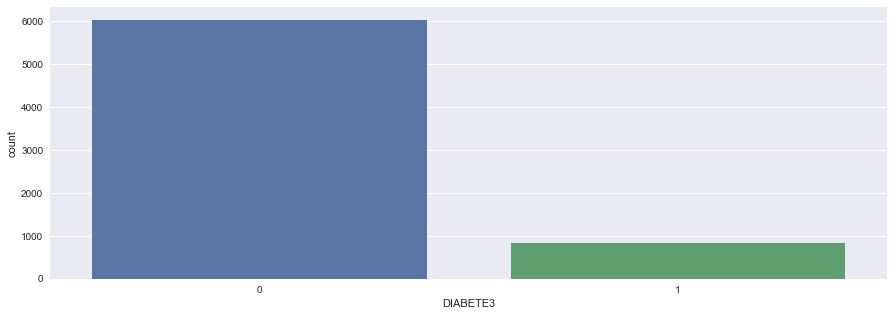

In [195]:
sns.countplot(x='DIABETE3',data=dataset)

As we have a look at Above Figure, it clearly shows how much biased our dataset is towards one class,
Class no diabetes has almost 90% data while just 10% data of class Diabetes exists,
which creates our dataset highly imbalanced if used directly for training ML model and at same time gives us an vague idea of
what SBU suspects of health status misrepresentation.

In [196]:
# lets confirm our findings by looking at statistics of values
print(dataset['DIABETE3'].value_counts()/np.float(len(dataset)))

0    0.877349
1    0.122651
Name: DIABETE3, dtype: float64


so 87% of survey respondents said no to diabetes while just 12% said they had diabetes

Before I go on to choosing and training my prediction algo, I would like to do feature engineering, where we need to check for null values present in dataset and eliminate them, and even do dimensionality reduction for choosing features which provide highest information for given dataset.

In [197]:
for ar in dataset.columns:
    if dataset[ar].isnull().sum()>0:
        print(ar, dataset[ar].isnull().mean())

STATERES 0.3159504734158776
LADULT 0.9994173343044428
NUMADULT 0.3159504734158776
CTYCODE1 1.0
LASTHCVT 0.8907501820830298
BRTHCNTL3 0.9364894391842681
TYPCNTRL2 0.9644573925710124
NOBCUSE2 0.9791697013838311
PRNTLVIT 0.9378004369992716


In [198]:
Clustering_data = dataset.copy()
#will be eliminating columns of little or no importance
Clustering_data.drop(['STATE','PRECALL','HEIGHT3','WEIGHT2','HTIN4','HTM4','WTKG3','DENSTR2','REPNUM','REPDEPTH','FMONTH','IDATE','IMONTH','IDAY','IYEAR','SEQNO','PSU','NATTMPTS','NRECSEL','NRECSEL','NRECSTR','STATERES','ZIPCODE','LADULT','CTYCODE1','LASTHCVT','BRTHCNTL3','TYPCNTRL2','NOBCUSE2','PRNTLVIT','NUMADULT'], axis=1,inplace=True)

Inorder to carry out ML analysis, we need to convert categorial values to numerical values

In [199]:
categorical = [var for var in balanced_data.columns if balanced_data[var].dtype=='O']
print('We got {} categorical variables'.format(len(categorical)))

We got 87 categorical variables


In [200]:
#converting all categorial data to numerical values

categorical = [var for var in categorical]
for col in categorical:
    ordered_labels = Clustering_data.groupby([col])['DIABETE3'].mean().to_dict()  
    # encode variables
    Clustering_data[col] = Clustering_data[col].map(ordered_labels)

In [201]:
Clustering_data.drop(labels=['DIABETE3'], inplace=True, axis=1)
Clustering_data.shape

(6865, 89)

In [202]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(Clustering_data)
labels = model.predict(Clustering_data)

In [203]:
import numpy
unique, counts = numpy.unique(labels, return_counts=True) 
dict(zip(unique, counts))

{0: 4696, 1: 2169}

In [204]:
Clustering_data['Cluster'] = labels

{0: 4696, 1: 2169}


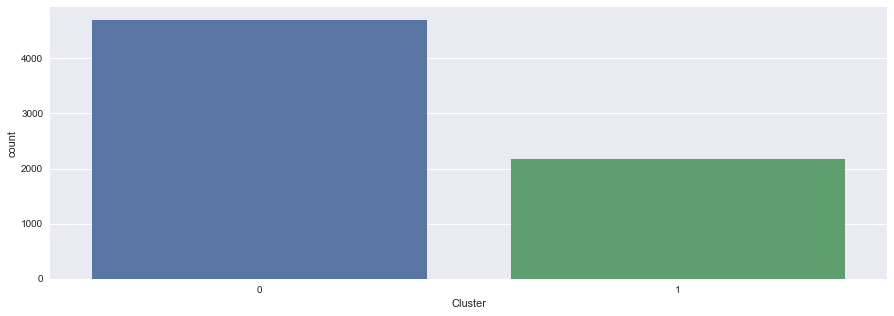

In [208]:
print(dict(zip(unique, counts)))
sns.countplot(x='Cluster',data=Clustering_data)

0    6023
1     842
Name: DIABETE3, dtype: int64


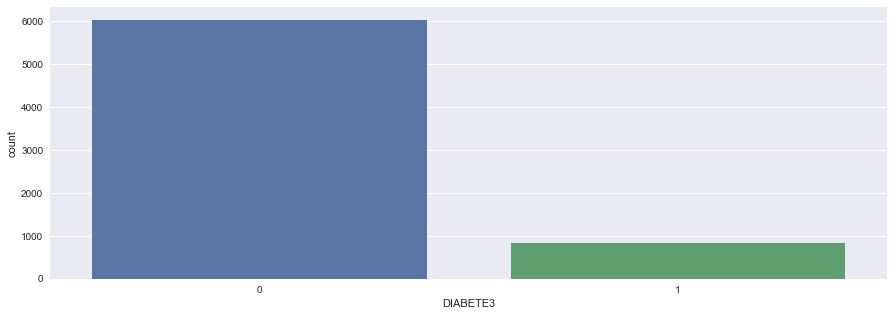

In [207]:
print(dataset['DIABETE3'].value_counts())
sns.countplot(x='DIABETE3',data=dataset)

### If we compare both the plots above, we can clearly see a huge difference in value of people having diabetes,the survey said just 842 ppl had diabetes, however our initial predicitions said otherwise with a count of 2169, so we can certainly say that, the survey is been misrepresented and need to carry out further analysis to find the faulty values and correct them using our prediction algorithm.

### So our initial hypothesis of data been not misreperesented is proved wrong and we need to start with figuring out effecient algorithms to find the misrepresented values

###  Importance of Data BALANCING

As in above case, dataset been imbalanced with 87% data of one class (no diabetes) and just 12% data of class (diabetes), training a predictive model based on it, is most likely going to give us results biased towards majority class.
So we need to sample dataset in a way that samples of both class are relatively equal.

The intern code didnt take that into consideration, so considering it now, Just to prove initial Hypothesis that there is no misrepresentation of data wrong.

In [210]:
diabetes = dataset[dataset.DIABETE3==1]
diabetes.shape

(842, 120)

In [211]:
non_diabetes = dataset[dataset.DIABETE3==0]
non_diabetes.shape

(6023, 120)

now will sample random data from non_diabetes section to balance with diabetes data

In [212]:
non_diabetes1 = non_diabetes.sample(n=842, random_state=2)

In [213]:
non_diabetes1.shape

(842, 120)

now will combine both equal sized dataframe into single dataframe for further processing

In [214]:
balanced_data = diabetes.append(non_diabetes1, ignore_index=True )

In [215]:
balanced_data.shape

(1684, 120)

In [216]:
# we need to delete the above columns along with that those columns with constant values which makes no sense

balanced_data.drop(['STATE','PRECALL','HEIGHT3','WEIGHT2','HTIN4','HTM4','WTKG3','DENSTR2','REPNUM','REPDEPTH','FMONTH','IDATE','IMONTH','IDAY','IYEAR','SEQNO','PSU','NATTMPTS','NRECSEL','NRECSEL','NRECSTR','STATERES','ZIPCODE','LADULT','CTYCODE1','LASTHCVT','BRTHCNTL3','TYPCNTRL2','NOBCUSE2','PRNTLVIT','NUMADULT'], axis=1,inplace=True)


In [51]:
balanced_data.shape

(1684, 90)

In [52]:
balanced_data.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION
0,202,1200,Missing,Missing,Missing,Fair,None,None,Not asked or Missing,No,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
1,202,1200,Missing,Missing,Missing,Fair,Number of days,Number of days,Number of days,No,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
2,201,1200,Missing,Missing,Missing,Very good,None,None,Not asked or Missing,Yes,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NYS exclusive of NYC
3,202,1200,Missing,Missing,Missing,Fair,Number of days,Number of days,Number of days,Yes,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
4,202,1200,Missing,Missing,Missing,Very good,None,None,Not asked or Missing,Yes,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_data, balanced_data.DIABETE3, test_size=0.20,random_state=0)
X_train.shape, X_test.shape

((1347, 90), (337, 90))

In [63]:
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

PVTRESD1 Yes        0.735709
Missing    0.264291
Name: PVTRESD1, dtype: float64

COLGHOUS Missing    1.0
Name: COLGHOUS, dtype: float64

CELLFON3 Yes        0.735709
Missing    0.264291
Name: CELLFON3, dtype: float64

GENHLTH Good                   0.331106
Very good              0.269488
Fair                   0.175204
Excellent              0.121752
Poor                   0.092799
Refused                0.008909
Dont know/Not Sure    0.000742
Name: GENHLTH, dtype: float64

PHYSHLTH None                   0.553081
Number of days         0.411284
Refused                0.019302
Dont know/Not sure    0.016333
Name: PHYSHLTH, dtype: float64

MENTHLTH None                   0.631032
Number of days         0.337045
Refused                0.020045
Dont know/Not sure    0.011878
Name: MENTHLTH, dtype: float64

POORHLTH Not asked or Missing    0.418708
None                    0.294729
Number of days          0.269488
Refused                 0.009651
Dont know/Not sure     0.007424
Name: P

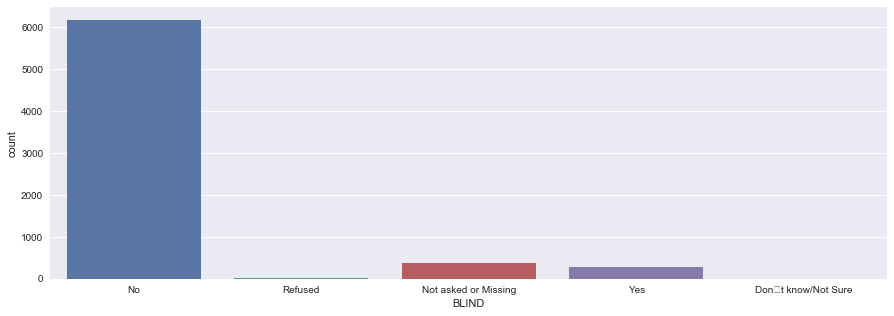

In [65]:
sns.countplot(x='BLIND',data=dataset)

If we look at above chart, we can clearly see that there are technically just 2 categories here, Yes and no, as rest entries can simply add to model overfitting,
we got alot of such columns which needs to be handled, as shown below

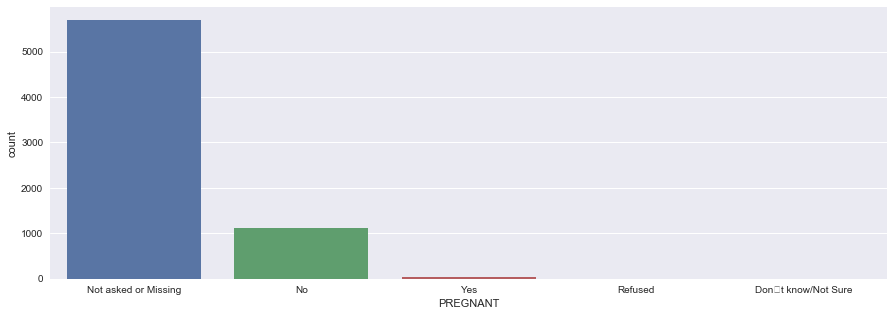

In [66]:
sns.countplot(x='PREGNANT',data=dataset)

Hence, I would suggest to first use a Dimensionality Reduction algorithm like PCA or SVG and then CARRY Out further category reduction on remaining features, but can be done in later part of optimization.

In [67]:
#finally encoding categorial variables
categorical = [var for var in categorical]
for col in categorical:
    ordered_labels = X_train.groupby([col])['DIABETE3'].mean().to_dict()  
    # encode variables
    X_train[col] = X_train[col].map(ordered_labels)
    X_test[col] = X_test[col].map(ordered_labels)

C:\Users\sugat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sugat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [68]:
X_train.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION
45,101,1100,0.547931,0.498144,0.547931,0.303030,0.406711,0.488235,0.427305,0.508857,...,0.515564,0.513043,0.487624,0.496252,0.558140,0.493497,0.508159,0.508146,0.506934,0.491503
775,201,1200,0.359551,0.498144,0.359551,0.724576,0.613718,0.513216,0.483627,0.508857,...,0.495541,0.495541,0.487624,0.496252,0.469189,0.493497,0.508159,0.508146,0.506934,0.491503
379,101,1100,0.547931,0.498144,0.547931,0.571749,0.406711,0.488235,0.427305,0.508857,...,0.495541,0.495541,0.487624,0.496252,0.469189,0.493497,0.508159,0.508146,0.506934,0.491503
61,101,1100,0.547931,0.498144,0.547931,0.724576,0.613718,0.513216,0.617080,0.508857,...,0.515564,0.506329,0.487624,0.496252,0.558140,0.493497,0.508159,0.508146,0.506934,0.491503
853,101,1200,0.547931,0.498144,0.547931,0.140244,0.406711,0.488235,0.427305,0.508857,...,0.495541,0.495541,0.487624,0.496252,0.469189,0.493497,0.508159,0.508146,0.506934,0.491503


In [71]:
#Similarly for X_test
X_test.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION
34,101,1100,0.547931,0.498144,0.547931,0.416667,0.613718,0.513216,0.617080,0.366337,...,0.515564,0.513043,0.572816,0.496252,0.469189,0.493497,0.508159,0.508146,0.506934,0.491503
268,102,1100,0.547931,0.498144,0.547931,0.571749,0.406711,0.488235,0.427305,0.508857,...,0.515564,0.513043,0.487624,0.496252,0.469189,0.493497,0.508159,0.508146,0.506934,0.491503
704,202,1100,0.359551,0.498144,0.359551,0.571749,0.613718,0.488235,0.617080,0.508857,...,0.515564,0.506329,0.487624,0.496252,0.650000,0.714286,0.508159,0.508146,0.506934,0.506873
1177,101,1100,0.547931,0.498144,0.547931,0.571749,0.613718,0.488235,0.483627,0.508857,...,0.515564,0.506329,0.487624,0.496252,0.558140,0.493497,0.508159,0.508146,0.506934,0.491503
1210,201,1100,0.359551,0.498144,0.359551,0.724576,0.461538,0.513216,0.617080,0.508857,...,0.515564,0.513043,0.487624,0.496252,0.558140,0.493497,0.508159,0.508146,0.506934,0.491503


In [72]:
# Splitting the Training set in label and features
y_train = X_train['DIABETE3']
y_test = X_test['DIABETE3']

# and then removing 'DIABETE3' from training set
X_train.drop(labels=['DIABETE3'], inplace=True, axis=1)
X_test.drop(labels=['DIABETE3'], inplace=True, axis=1)


C:\Users\sugat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sugat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [73]:
y_train.head()

45     1
775    1
379    1
61     1
853    0
Name: DIABETE3, dtype: int32

In [79]:
# Let us just cross-check if our dataset contains any null values befr we proceed
X_train.isnull().values.any()

False

In [81]:
X_test.isnull().values.any()

True

In [85]:
# So our test set contains Null values, so for now I will just fill it will 0
X_test = X_test.fillna(0)

In [86]:
X_test.isnull().values.any()

False

As stated above, I can even carry out correlation calculation, to remove features which are highly correlated above a certain threshold, but can be done in later optimization

### Running Prediction Algorithms to find out faulty values

### SVM

In [87]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
pred = clf.predict(X_test)

In [89]:
#Calculating accuracy for given predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7210682492581603

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

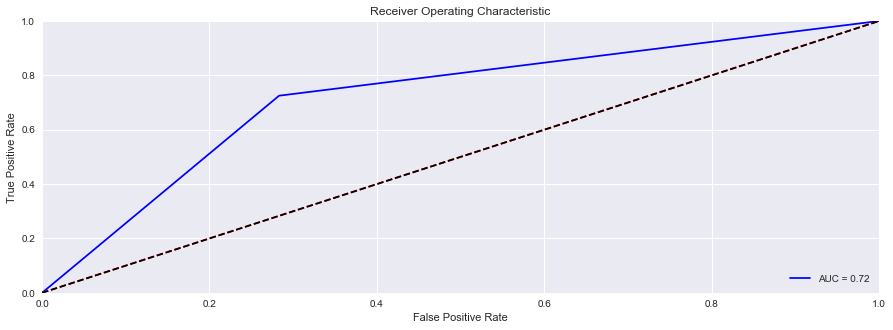

In [92]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))


             precision    recall  f1-score   support

          0       0.72      0.72      0.72       166
          1       0.73      0.73      0.73       171

avg / total       0.72      0.72      0.72       337



In [95]:
print(confusion_matrix(y_test, pred))

[[119  47]
 [ 47 124]]


### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

C:\Users\sugat\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [98]:
accuracy_score(y_test, predict)

0.8545994065281899

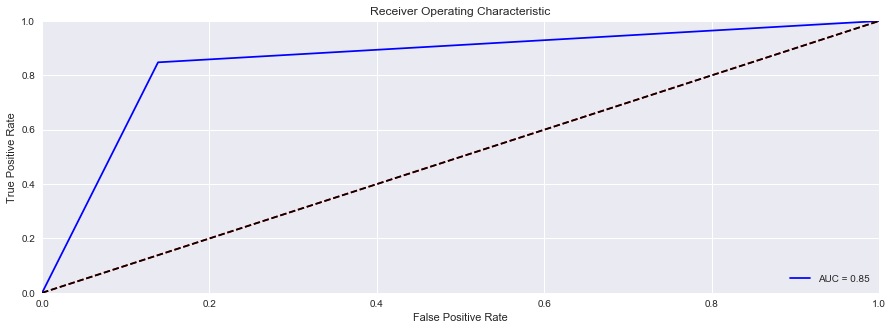

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As we see with Random Forest we have much better prediction than SVM, so yes our Intern is definitely on right track in selecting an right algorithm, its just matter of selecting right parameters and tuning the algorithm to avoid overfitting.

In [101]:
print(classification_report(y_test,predict))


             precision    recall  f1-score   support

          0       0.85      0.86      0.85       166
          1       0.86      0.85      0.86       171

avg / total       0.85      0.85      0.85       337



In [102]:
print(confusion_matrix(y_test, predict))

[[143  23]
 [ 26 145]]


### So using the confusiion matrix we can find out all "False Positives" values which are represented as no-diabetes in dataset but detected as diabetes by our algorithm, clearly raising some red flags.